<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_12/02_pca_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.pipeline import make_pipeline

<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

✨BONUS

 - Create a Scree Plot (You will probably have to research this)

#  Load the Dataset

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
380,1,107,72,30,82,30.8,0.821,24,0
517,7,125,86,0,0,37.6,0.304,51,0
73,4,129,86,20,270,35.1,0.231,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Split Data 

In [6]:
X = df.iloc[:, 0:-1]
y= df.iloc[:, -1]

In [8]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# Finding Correlation among the variables

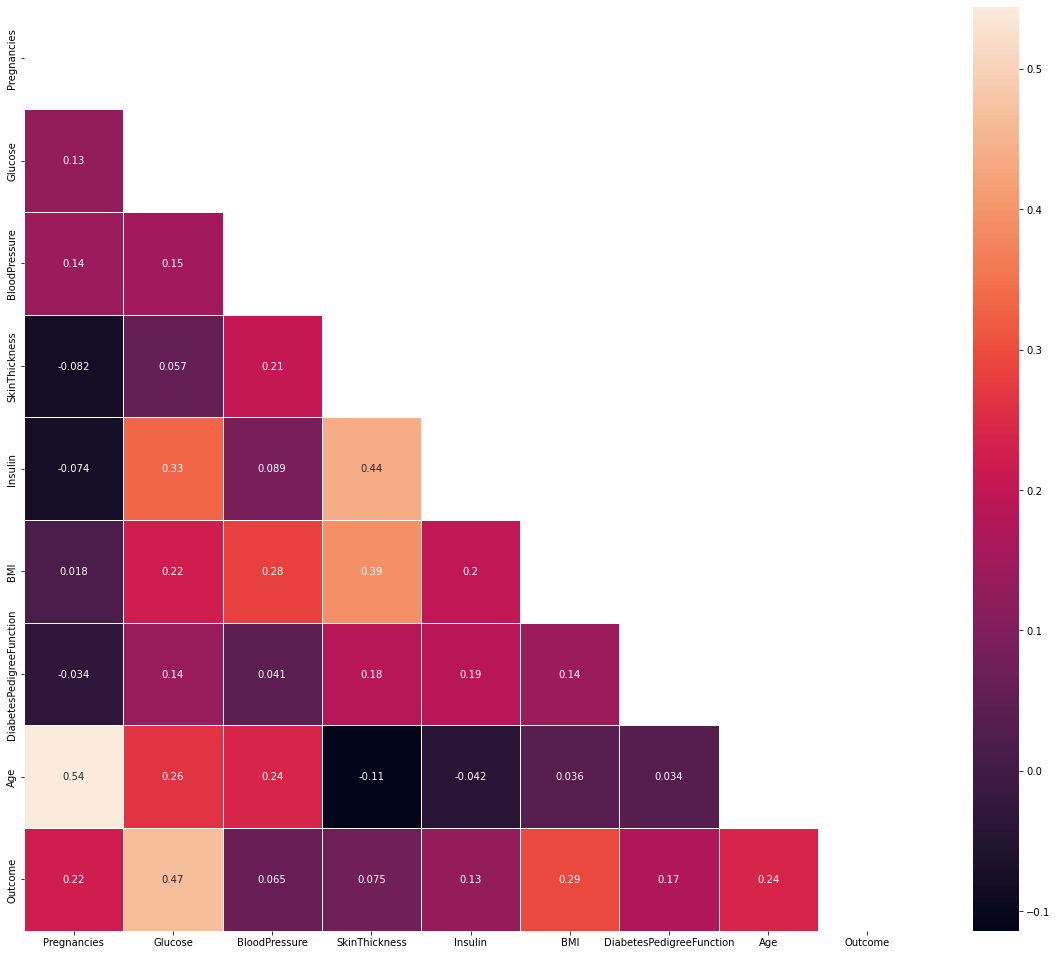

In [11]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

# Blood Pressure

In [12]:
bp_bins = [0,60,80,90,100]
bp_labels = ["Low BP","Ideal BP", "Pre-high BP", "High BP"]
df["BloodPressure Buckets"] = pd.cut(df["BloodPressure"], bp_bins, labels = bp_labels)

In [13]:
df["BloodPressure Buckets"].value_counts()

Ideal BP       445
Pre-high BP    127
Low BP         123
High BP         25
Name: BloodPressure Buckets, dtype: int64

Text(0.5, 1.0, 'Females having Pre-High Blood Pressure')

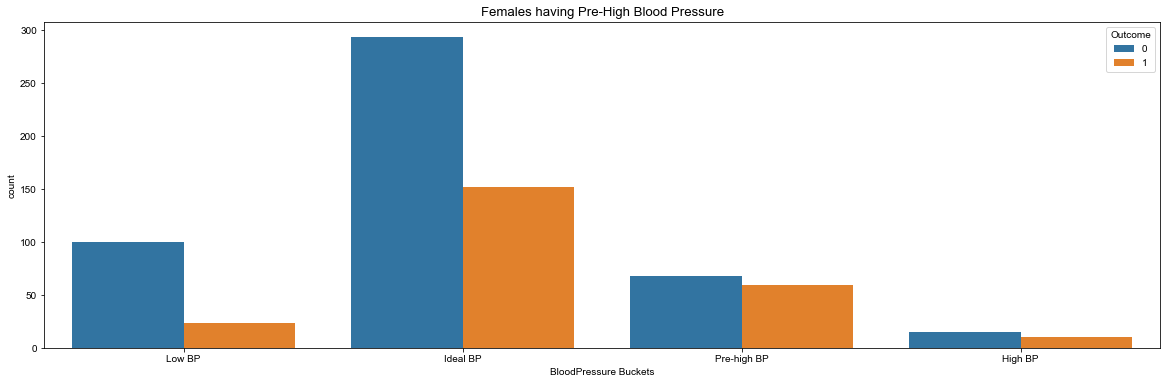

In [14]:
plt.figure(figsize = (20,6))
sns.countplot(x = df["BloodPressure Buckets"], hue = df["Outcome"])
sns.set(font_scale = 1.1)  
plt.title("Females having Pre-High Blood Pressure")
#As per the graph,females having Pre-High Blood Pressure and High Blood Pressure are at a higher risk of being diagnosed with diabetes.

# Pregnancies

Text(0.5, 1.0, ' Who have had babies more than 6 times ')

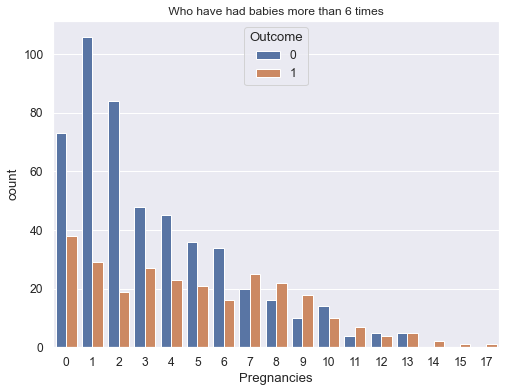

In [15]:
plt.figure(figsize = (8,6))

sns.countplot(x = df["Pregnancies"], hue = df["Outcome"])
sns.set(font_scale = 1) #Ladies who have had babies more than 6 times have higher risk of having diabetes.

plt.title(" Who have had babies more than 6 times ")

# KNN (Baseline)

In [16]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [17]:
pr = knn.predict(X_test)
print(classification_report(y_test,pr)) #Report

              precision    recall  f1-score   support

           0       0.72      0.89      0.79        99
           1       0.65      0.36      0.47        55

    accuracy                           0.70       154
   macro avg       0.68      0.63      0.63       154
weighted avg       0.69      0.70      0.68       154



# Logistic Regression Without PCA

In [18]:
pipe = make_pipeline(
LogisticRegression (max_iter=2085))

pipe.fit(X_train,y_train)
pipe.score(X_train,y_train)

0.7703583061889251

In [19]:
pipe.score(X_test,y_test)

0.7467532467532467

# Comparing between Baseline & Logistic

In [20]:
print(classification_report(y_test,pr)) 

              precision    recall  f1-score   support

           0       0.72      0.89      0.79        99
           1       0.65      0.36      0.47        55

    accuracy                           0.70       154
   macro avg       0.68      0.63      0.63       154
weighted avg       0.69      0.70      0.68       154



In [21]:
predict = pipe.predict(X_test)
print(classification_report(y_test,predict)) 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [22]:
# Measure how long it takes to train KNN

%timeit knn.fit(X_train, y_train)

1.28 ms ± 48.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [23]:
# Measure how long it takes to train Logistic Regression Witout PCA

%timeit pipe.fit(X_train, y_train)

27.7 ms ± 2.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Using Pipeline (PCA)

In [24]:
Pipeline1 = make_pipeline(
  StandardScaler(),
    PCA(n_components = 3),
     LogisticRegression()
)

Pipeline1.fit(X_train,y_train)
print('Training accuracy:', Pipeline1.score(X_train, y_train))
print('Testing accuracy:', Pipeline1.score(X_test, y_test))

Training accuracy: 0.7231270358306189
Testing accuracy: 0.7272727272727273


In [25]:
predic= Pipeline1.predict(X_test)
print(classification_report(y_test,predic)) 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.64      0.55      0.59        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154



# Comparing between Baseline & Logistic With PCA and Without PCA :

# KNN

In [26]:
print(classification_report(y_test,pr)) #Report

              precision    recall  f1-score   support

           0       0.72      0.89      0.79        99
           1       0.65      0.36      0.47        55

    accuracy                           0.70       154
   macro avg       0.68      0.63      0.63       154
weighted avg       0.69      0.70      0.68       154



In [27]:
%timeit knn.fit(X_train, y_train)

1.31 ms ± 40.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Logistic Regression Without PCA

In [28]:
print(classification_report(y_test,predict))  #Report

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [29]:
%timeit pipe.fit(X_train, y_train)

30.6 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Logistic Regression With PCA

In [30]:
print(classification_report(y_test,predic))  #Report

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.64      0.55      0.59        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154



In [31]:
%timeit Pipeline1.fit(X_train, y_train) #Low execution time ✨✨

5.57 ms ± 160 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
